## Object: Traditional Food

In [ ]:
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array, to_categorical
folder = '/content/drive/MyDrive/AI-project/Food/food_train/'
x_train,y_train=list(),list()
for file in listdir(folder):
  output=0
  if file.startswith('banh chung '): 
    output=1
  if file.startswith('banh mi '): 
    output=2
  if file.startswith('banh trung thu '): 
    output=3  
  if file.startswith('banh xeo '): 
    output=4
  if file.startswith('bun bo hue '): 
    output=5
  if file.startswith('bun thit nuong '): 
    output=6
  if file.startswith('che dau den '): 
    output=7
  if file.startswith('cơm tam '): 
    output=8
  if file.startswith('thit ga '): 
    output=9
  if file.startswith('xoi gac '): 
    output=10
  photo=load_img(folder+file,target_size=(30,30))
  photo=img_to_array(photo)
  x_train.append(photo)
  y_train.append(output)
x_train=asarray(x_train) 
y_train=asarray(y_train)
y_train =to_categorical(y_train,11) 
print(x_train.shape,y_train.shape)
save('x_train.npy',x_train)
save('y_train.npy',y_train)

x_train = x_train.reshape(1400, 30, 30, 3)
x_train= x_train.astype('float32')/255
print(x_train.shape)

folder = '/content/drive/MyDrive/AI-project/Food/food_test/'
x_test,y_test=list(),list()
for file in listdir(folder):
  output=0
  if file.startswith('banh chung '): 
    output=1
  if file.startswith('banh mi '): 
    output=2
  if file.startswith('banh trung thu '): 
    output=3  
  if file.startswith('banh xeo '): 
    output=4
  if file.startswith('bun bo hue '): 
    output=5
  if file.startswith('bun thit nuong '): 
    output=6
  if file.startswith('che dau den '): 
    output=7
  if file.startswith('cơm tam '): 
    output=8
  if file.startswith('thit ga '): 
    output=9
  if file.startswith('xoi gac '): 
    output=10
  photo=load_img(folder+file,target_size=(30,30))
  photo=img_to_array(photo)
  x_test.append(photo)
  y_test.append(output)
x_test=asarray(x_test) 
y_test=asarray(y_test) 
y_test =to_categorical(y_test,11)
print(x_test.shape,y_test.shape)
save('x_test.npy',x_test)
save('y_test.npy',y_test)

x_test = x_test.reshape(100, 30, 30, 3)
x_test=  x_test.astype('float32')/255
print(x_test.shape)

(1400, 30, 30, 3) (1400, 11)
(1400, 30, 30, 3)
(100, 30, 30, 3) (100, 11)
(100, 30, 30, 3)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,LeakyReLU
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(30,30,3),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(11,activation='softmax'))

from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
train = model.fit(x_train,y_train,batch_size=64,epochs=50,verbose=1)
model.summary()

acc,loss  = model.evaluate(x_test,y_test)

Epoch 1/50
22/22 [==============================] - 1s 11ms/step - loss: 2.3215 - accuracy: 0.1271
Epoch 2/50
22/22 [==============================] - 0s 11ms/step - loss: 2.0497 - accuracy: 0.2536
Epoch 3/50
22/22 [==============================] - 0s 13ms/step - loss: 1.7543 - accuracy: 0.3379
Epoch 4/50
22/22 [==============================] - 0s 12ms/step - loss: 1.5628 - accuracy: 0.4193
Epoch 5/50
22/22 [==============================] - 0s 10ms/step - loss: 1.4325 - accuracy: 0.4836
Epoch 6/50
22/22 [==============================] - 0s 12ms/step - loss: 1.2981 - accuracy: 0.5179
Epoch 7/50
22/22 [==============================] - 0s 8ms/step - loss: 1.2471 - accuracy: 0.5457
Epoch 8/50
22/22 [==============================] - 0s 10ms/step - loss: 1.2240 - accuracy: 0.5443
Epoch 9/50
22/22 [==============================] - 0s 12ms/step - loss: 1.1599 - accuracy: 0.5907
Epoch 10/50
22/22 [==============================] - 0s 11ms/step - loss: 1.1100 - accuracy: 0.5971
Epoch 11/5

In [ ]:
model.save('food.h5')

Input Food: bun bo hue
1/1 [==============================] - 0s 23ms/step
Predicted label: bun bo hue
1/1 [==============================] - 0s 20ms/step
Predicted label: bun thit nuong
1/1 [==============================] - 0s 22ms/step
Predicted label: bun thit nuong
1/1 [==============================] - 0s 33ms/step
Predicted label: bun bo hue
1/1 [==============================] - 0s 33ms/step
Predicted label: bun thit nuong
1/1 [==============================] - 0s 35ms/step
Predicted label: bun bo hue
1/1 [==============================] - 0s 30ms/step
Predicted label: bun bo hue
1/1 [==============================] - 0s 29ms/step
Predicted label: bun bo hue
1/1 [==============================] - 0s 28ms/step
Predicted label: bun bo hue
1/1 [==============================] - 0s 29ms/step
Predicted label: bun bo hue


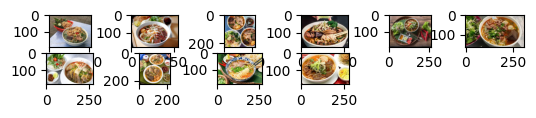

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
folder = '/content/drive/MyDrive/AI-project/Food/food_test/'
dict = {1:'banh chung', 2:'banh mi', 3:'banh trung thu', 4:'banh xeo', 5:'bun bo hue', 6:'bun thit nuong',7:'che dau den', 8:'com tam', 9:'thit ga', 10:'xoi gac'}

input_ = input("Input Food: ")
for i in range(10):
  plt.subplot(10,6,i+1)
  filename = folder + input_ + ' (' + str(i+1) + ').jpg'
  img = imread(filename)
  plt.imshow(img)
  
  img = load_img(filename, target_size=(30, 30))
  img_arr = img_to_array(img)
  img_arr = img_arr.reshape((1,) + img_arr.shape)
  img_arr = img_arr.astype('float32')/255
  prediction = model.predict(img_arr)
  label = np.argmax(prediction)
  print('Predicted label:', dict[label])
plt.show()

1/1 [==============================] - 0s 19ms/step
Predicted label: banh trung thu


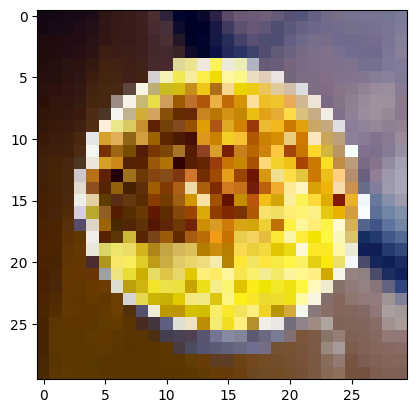

In [ ]:
from keras.utils import load_img
from keras.utils import img_to_array
img = load_img('/content/drive/MyDrive/AI-project/Food/xôi_cát.jpg',target_size=(30,30))
dict = {1:'banh chung', 2:'banh mi', 3:'banh trung thu', 4:'banh xeo', 5:'bun bo hue', 6:'bun thit nuong',7:'che dau den', 8:'com tam', 9:'thit ga', 10:'xoi gac'}
plt.imshow(img)

import numpy as np
img = img_to_array(img)
img = img.reshape(1,30,30,3)
img = img.astype('float32')/255
prediction = model.predict(img)
label = np.argmax(prediction)
print('Predicted label:', dict[label])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')